In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import gridplot
import bokeh.palettes as bpal
from bokeh.models import ColumnDataSource, CategoricalColorMapper
from bokeh.transform import factor_cmap, linear_cmap
output_notebook()

Loading BokehJS ...

In [5]:
from glob import glob

In [6]:
feat_files = glob('../data/ready-for-model/*.csv')
feat_files

['../data/ready-for-model/2009-18_NEMtotaldemand.csv',
 '../data/ready-for-model/20190226_SAdf_features.csv',
 '../data/ready-for-model/20190226_TASdf_features.csv',
 '../data/ready-for-model/20190226_NSWdf_features.csv',
 '../data/ready-for-model/20190226_VICdf_features.csv',
 '../data/ready-for-model/20190226_QLDdf_features.csv']

In [7]:
fvic = feat_files[-2]
fvic

'../data/ready-for-model/20190226_VICdf_features.csv'

In [8]:
ftarget = feat_files[0]
ftarget

'../data/ready-for-model/2009-18_NEMtotaldemand.csv'

In [9]:
dfvic = pd.read_csv(fvic, index_col=0, parse_dates=[0])
dfvic.head()

,Date,Hour_of_day,Year,shoulder,summer,winter,workdayVIC,MILDURA-AIRPORT_MinT_76031,CAPE-NELSON_MaxT_90184,MORWELL_MaxT_85280,MELBOURNE-AIRPORT_MinT_86282,CAPE-NELSON_MinT_90184,MILDURA-AIRPORT_MaxT_76031,MELBOURNE-AIRPORT_MaxT_86282,MORWELL_MinT_85280
SETTLEMENTDATE,,,,,,,,,,,,,,,
2009-01-01 00:30:00,2009-01-01,0.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4
2009-01-01 01:00:00,2009-01-01,1.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4
2009-01-01 01:30:00,2009-01-01,1.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4
2009-01-01 02:00:00,2009-01-01,2.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4
2009-01-01 02:30:00,2009-01-01,2.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4


In [10]:
dfvic.isnull().sum().sum()

577

In [11]:
dfvic.isnull().sum()

Date                              0
Hour_of_day                       0
Year                              0
shoulder                          0
summer                            0
winter                            0
workdayVIC                        1
MILDURA-AIRPORT_MinT_76031        0
CAPE-NELSON_MaxT_90184          144
MORWELL_MaxT_85280              144
MELBOURNE-AIRPORT_MinT_86282      0
CAPE-NELSON_MinT_90184          144
MILDURA-AIRPORT_MaxT_76031        0
MELBOURNE-AIRPORT_MaxT_86282      0
MORWELL_MinT_85280              144
dtype: int64

In [12]:
dfvic.dropna(inplace=True) # just for now, will skip where I don't have temp data, will try and get better data later

In [13]:
dftarget = pd.read_csv(ftarget, index_col=0, parse_dates=[0])
dftarget.head()

,NSW1,QLD1,SA1,TAS1,VIC1,NEMtotal
SETTLEMENTDATE,,,,,,
2009-01-01 00:30:00,7535.00,5611.54,1310.89,909.71,4799.87,20167.01
2009-01-01 01:00:00,7229.24,5457.34,1272.69,896.63,4646.21,19502.11
2009-01-01 01:30:00,6857.62,5294.12,1178.87,897.52,4950.16,19178.29
2009-01-01 02:00:00,6535.05,5153.47,1130.78,906.22,4755.46,18480.98
2009-01-01 02:30:00,6287.88,5060.33,1059.53,893.19,4545.67,17846.60


In [14]:
dfvic = pd.merge(dfvic, dftarget[['VIC1']], how='inner', left_index=True, right_index=True)
dfvic.head(3)

,Date,Hour_of_day,Year,shoulder,summer,winter,workdayVIC,MILDURA-AIRPORT_MinT_76031,CAPE-NELSON_MaxT_90184,MORWELL_MaxT_85280,MELBOURNE-AIRPORT_MinT_86282,CAPE-NELSON_MinT_90184,MILDURA-AIRPORT_MaxT_76031,MELBOURNE-AIRPORT_MaxT_86282,MORWELL_MinT_85280,VIC1
SETTLEMENTDATE,,,,,,,,,,,,,,,,
2009-01-01 00:30:00,2009-01-01,0.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4799.87
2009-01-01 01:00:00,2009-01-01,1.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4646.21
2009-01-01 01:30:00,2009-01-01,1.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4950.16


In [15]:
dfvic.insert(loc=1, column='Month', value=dfvic.index.month)
dfvic.drop(columns=[c for c in dfvic.columns if 'work' in c and 'VIC' not in c], inplace=True)
dfvic.head(3)

,Date,Month,Hour_of_day,Year,shoulder,summer,winter,workdayVIC,MILDURA-AIRPORT_MinT_76031,CAPE-NELSON_MaxT_90184,MORWELL_MaxT_85280,MELBOURNE-AIRPORT_MinT_86282,CAPE-NELSON_MinT_90184,MILDURA-AIRPORT_MaxT_76031,MELBOURNE-AIRPORT_MaxT_86282,MORWELL_MinT_85280,VIC1
SETTLEMENTDATE,,,,,,,,,,,,,,,,,
2009-01-01 00:30:00,2009-01-01,1,0.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4799.87
2009-01-01 01:00:00,2009-01-01,1,1.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4646.21
2009-01-01 01:30:00,2009-01-01,1,1.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4950.16


In [16]:
onehour = dfvic[dfvic.Hour_of_day == 12].copy()
# onehour.drop(columns=[c for c in onehour.columns if 'work' in c and 'VIC' not in c], inplace=True)
onehour

,Date,Month,Hour_of_day,Year,shoulder,summer,winter,workdayVIC,MILDURA-AIRPORT_MinT_76031,CAPE-NELSON_MaxT_90184,MORWELL_MaxT_85280,MELBOURNE-AIRPORT_MinT_86282,CAPE-NELSON_MinT_90184,MILDURA-AIRPORT_MaxT_76031,MELBOURNE-AIRPORT_MaxT_86282,MORWELL_MinT_85280,VIC1
SETTLEMENTDATE,,,,,,,,,,,,,,,,,
2009-01-01 12:00:00,2009-01-01,1,12.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4652.27
2009-01-02 12:00:00,2009-01-02,1,12.0,2009,0,1,0,1.0,8.9,16.0,18.7,7.8,10.0,24.8,17.8,8.1,5262.49
2009-01-03 12:00:00,2009-01-03,1,12.0,2009,0,1,0,0.0,10.6,17.5,21.9,6.3,6.6,28.6,21.1,1.8,5122.20
2009-01-04 12:00:00,2009-01-04,1,12.0,2009,0,1,0,0.0,13.2,19.4,29.3,8.1,12.7,34.5,29.2,5.4,5209.01
2009-01-05 12:00:00,2009-01-05,1,12.0,2009,0,1,0,1.0,16.5,20.0,30.8,9.7,7.8,37.3,29.0,7.9,6329.80
2009-01-06 12:00:00,2009-01-06,1,12.0,2009,0,1,0,1.0,15.7,20.4,31.9,13.5,14.8,39.2,31.7,10.5,6849.42
2009-01-07 12:00:00,2009-01-07,1,12.0,2009,0,1,0,1.0,17.0,19.3,22.9,15.8,13.2,32.3,21.4,13.9,6311.68
2009-01-08 12:00:00,2009-01-08,1,12.0,2009,0,1,0,1.0,12.9,16.7,20.0,9.7,13.0,27.3,18.4,11.0,5878.44
2009-01-09 12:00:00,2009-01-09,1,12.0,2009,0,1,0,1.0,12.3,18.1,23.9,10.2,12.9,27.8,19.7,3.4,6001.01


In [17]:
if 'Month' in onehour.columns:
    onehour.Month = onehour.index.month
else:
    onehour.insert(1, 'Month', onehour.index.month)
onehour.head()

,Date,Month,Hour_of_day,Year,shoulder,summer,winter,workdayVIC,MILDURA-AIRPORT_MinT_76031,CAPE-NELSON_MaxT_90184,MORWELL_MaxT_85280,MELBOURNE-AIRPORT_MinT_86282,CAPE-NELSON_MinT_90184,MILDURA-AIRPORT_MaxT_76031,MELBOURNE-AIRPORT_MaxT_86282,MORWELL_MinT_85280,VIC1
SETTLEMENTDATE,,,,,,,,,,,,,,,,,
2009-01-01 12:00:00,2009-01-01,1,12.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4652.27
2009-01-02 12:00:00,2009-01-02,1,12.0,2009,0,1,0,1.0,8.9,16.0,18.7,7.8,10.0,24.8,17.8,8.1,5262.49
2009-01-03 12:00:00,2009-01-03,1,12.0,2009,0,1,0,0.0,10.6,17.5,21.9,6.3,6.6,28.6,21.1,1.8,5122.20
2009-01-04 12:00:00,2009-01-04,1,12.0,2009,0,1,0,0.0,13.2,19.4,29.3,8.1,12.7,34.5,29.2,5.4,5209.01
2009-01-05 12:00:00,2009-01-05,1,12.0,2009,0,1,0,1.0,16.5,20.0,30.8,9.7,7.8,37.3,29.0,7.9,6329.80


In [18]:
bpal.Category10_10

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [19]:
jan = onehour[(onehour.Month == 1) & (onehour.workdayVIC == 1)]

In [22]:
xjan = jan['MELBOURNE-AIRPORT_MaxT_86282']
yjan = jan.VIC1
cjan = jan.Year

yr_cmap = linear_cmap('c', palette=bpal.Spectral9, low=jan.Year.min(), high=jan.Year.max())

pjan = figure(plot_width = 900, plot_height=600)
csource = ColumnDataSource(dict(x=xjan, y=yjan, c=cjan))
pjan.circle(x='x', y='y', fill_color=yr_cmap, source=csource, line_color=None, size=6)

show(pjan)

In [21]:
# ## simpler version, don't need ColumnDataSource
# yr_cmap = linear_cmap('Year', palette=bpal.Spectral9, low=jan.Year.min(), high=jan.Year.max())

# pjan = figure(plot_width = 900, plot_height=600)

# pjan.circle(x='MELBOURNE-AIRPORT_MaxT_86282', y='VIC1', fill_color=yr_cmap, source=jan, line_color=None, size=6)

# show(pjan)

In [31]:
yr_cmap

{'field': 'Year', 'transform': LinearColorMapper(id='1003', ...)}

In [32]:
dfvic

,Date,Month,Hour_of_day,Year,shoulder,summer,winter,workdayVIC,MILDURA-AIRPORT_MinT_76031,CAPE-NELSON_MaxT_90184,MORWELL_MaxT_85280,MELBOURNE-AIRPORT_MinT_86282,CAPE-NELSON_MinT_90184,MILDURA-AIRPORT_MaxT_76031,MELBOURNE-AIRPORT_MaxT_86282,MORWELL_MinT_85280,VIC1
SETTLEMENTDATE,,,,,,,,,,,,,,,,,
2009-01-01 00:30:00,2009-01-01,1,0.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4799.87
2009-01-01 01:00:00,2009-01-01,1,1.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4646.21
2009-01-01 01:30:00,2009-01-01,1,1.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4950.16
2009-01-01 02:00:00,2009-01-01,1,2.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4755.46
2009-01-01 02:30:00,2009-01-01,1,2.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4545.67
2009-01-01 03:00:00,2009-01-01,1,3.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4344.02
2009-01-01 03:30:00,2009-01-01,1,3.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4193.49
2009-01-01 04:00:00,2009-01-01,1,4.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4091.29
2009-01-01 04:30:00,2009-01-01,1,4.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4062.91


In [33]:
sts = StandardScaler()

In [34]:
sts.fit(dfvic.iloc[:,1:-1])

/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
sts.mean_

array([6.52132566e+00, 1.17501345e+01, 2.01350457e+03, 5.00961285e-01,
       2.46632640e-01, 2.52406074e-01, 6.84984494e-01, 1.07983034e+01,
       1.79879862e+01, 2.05853702e+01, 9.93985672e+00, 1.16664780e+01,
       2.50142940e+01, 2.06175698e+01, 8.52048339e+00])

In [36]:
dfvic

,Date,Month,Hour_of_day,Year,shoulder,summer,winter,workdayVIC,MILDURA-AIRPORT_MinT_76031,CAPE-NELSON_MaxT_90184,MORWELL_MaxT_85280,MELBOURNE-AIRPORT_MinT_86282,CAPE-NELSON_MinT_90184,MILDURA-AIRPORT_MaxT_76031,MELBOURNE-AIRPORT_MaxT_86282,MORWELL_MinT_85280,VIC1
SETTLEMENTDATE,,,,,,,,,,,,,,,,,
2009-01-01 00:30:00,2009-01-01,1,0.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4799.87
2009-01-01 01:00:00,2009-01-01,1,1.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4646.21
2009-01-01 01:30:00,2009-01-01,1,1.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4950.16
2009-01-01 02:00:00,2009-01-01,1,2.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4755.46
2009-01-01 02:30:00,2009-01-01,1,2.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4545.67
2009-01-01 03:00:00,2009-01-01,1,3.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4344.02
2009-01-01 03:30:00,2009-01-01,1,3.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4193.49
2009-01-01 04:00:00,2009-01-01,1,4.0,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4091.29
2009-01-01 04:30:00,2009-01-01,1,4.5,2009,0,1,0,0.0,13.8,15.9,20.1,11.2,12.7,27.4,19.9,9.4,4062.91


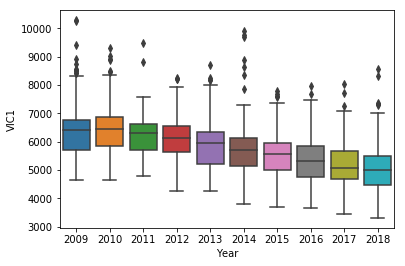

In [37]:
sns.boxplot(data=dfvic[dfvic.Hour_of_day == 12], x='Year', y='VIC1')

/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


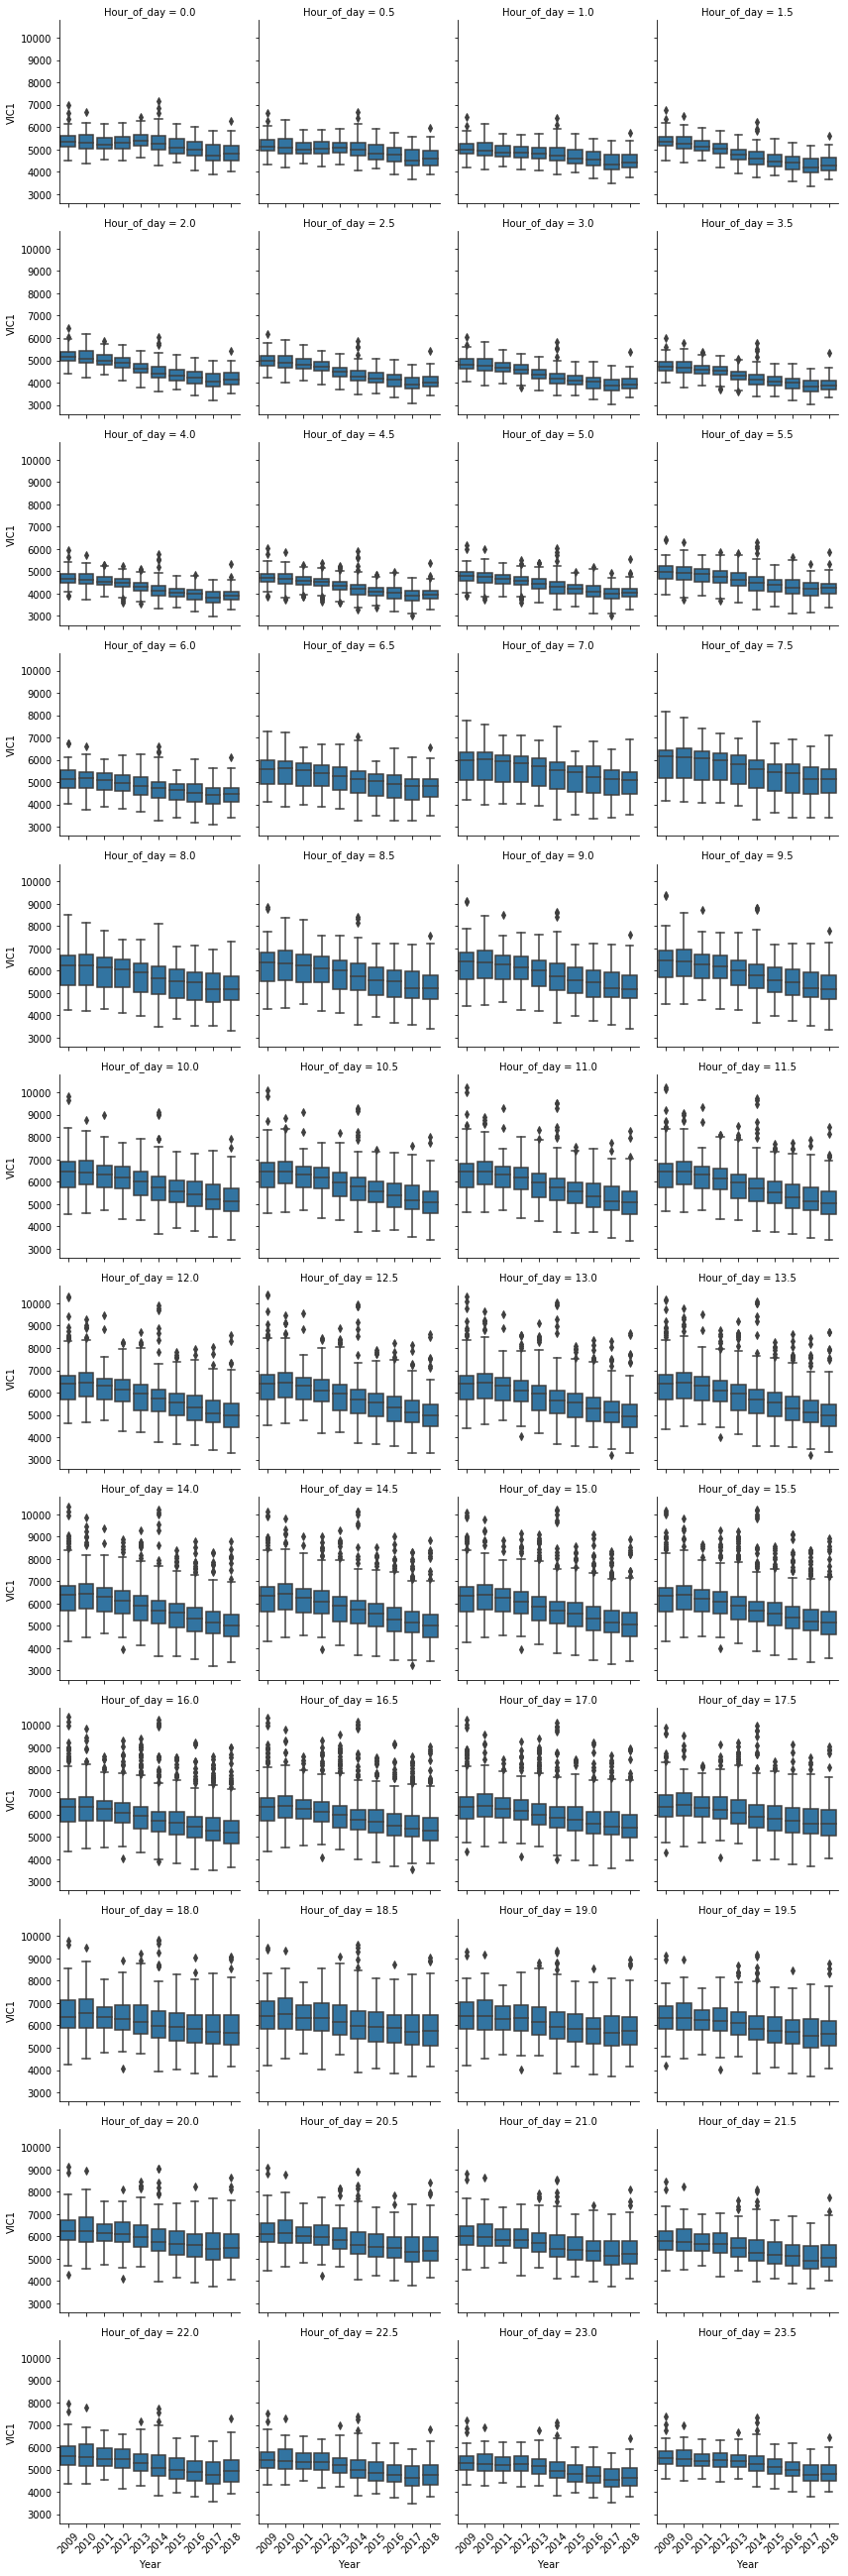

<Figure size 432x288 with 0 Axes>

In [38]:
g = sns.FacetGrid(dfvic, col='Hour_of_day', col_wrap=4)
g.map(sns.boxplot, 'Year', 'VIC1')
g.set_xticklabels(rotation=45)
plt.show()
plt.savefig('vic-hourly-boxplot-year.png')

In [39]:
temps = sorted([c for c in dfvic.columns if 'T_' in c])
temps

['CAPE-NELSON_MaxT_90184',
 'CAPE-NELSON_MinT_90184',
 'MELBOURNE-AIRPORT_MaxT_86282',
 'MELBOURNE-AIRPORT_MinT_86282',
 'MILDURA-AIRPORT_MaxT_76031',
 'MILDURA-AIRPORT_MinT_76031',
 'MORWELL_MaxT_85280',
 'MORWELL_MinT_85280']

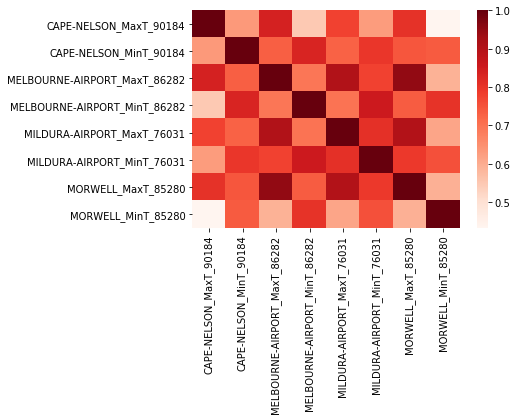

In [40]:
sns.heatmap(dfvic[temps].corr(), cmap='Reds')

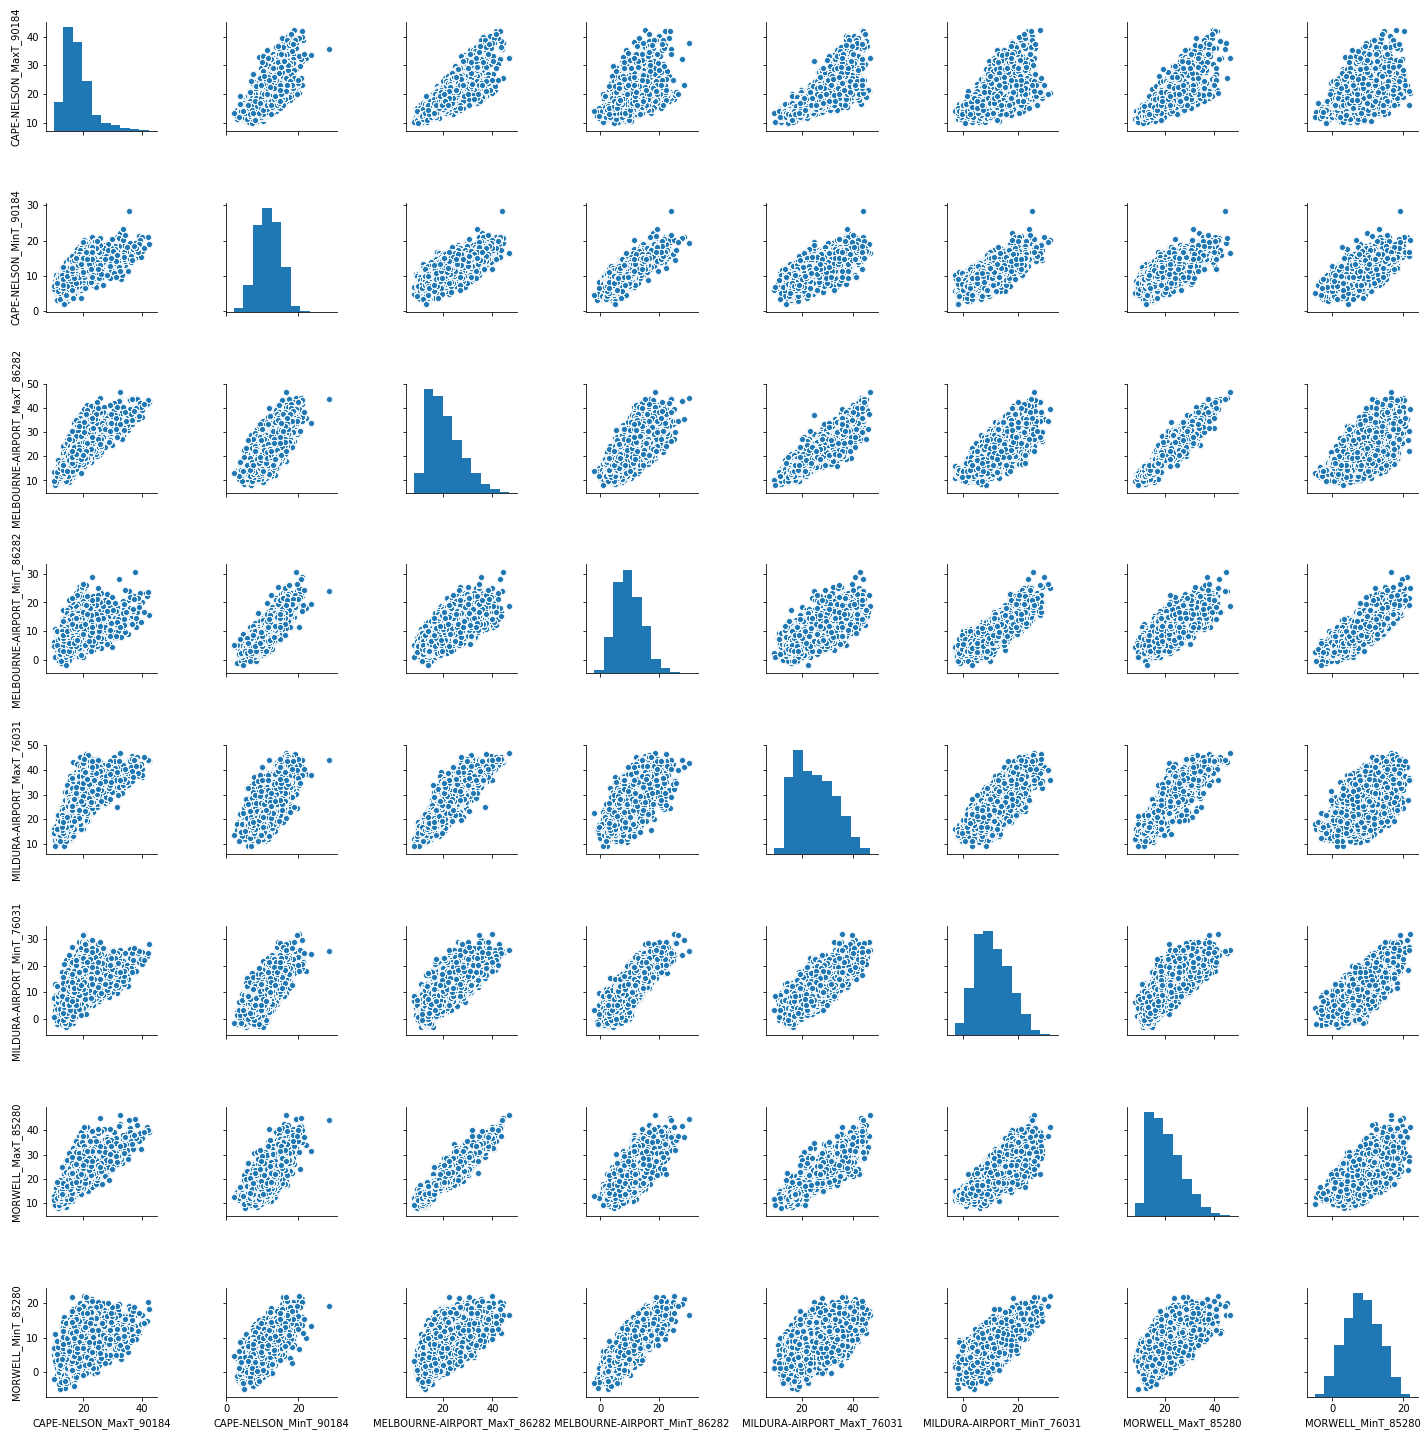

In [41]:
sns.pairplot(dfvic[temps])
plt.show()

In [42]:
dftarget.head()

,NSW1,QLD1,SA1,TAS1,VIC1,NEMtotal
SETTLEMENTDATE,,,,,,
2009-01-01 00:30:00,7535.00,5611.54,1310.89,909.71,4799.87,20167.01
2009-01-01 01:00:00,7229.24,5457.34,1272.69,896.63,4646.21,19502.11
2009-01-01 01:30:00,6857.62,5294.12,1178.87,897.52,4950.16,19178.29
2009-01-01 02:00:00,6535.05,5153.47,1130.78,906.22,4755.46,18480.98
2009-01-01 02:30:00,6287.88,5060.33,1059.53,893.19,4545.67,17846.60


In [43]:
victarget = dftarget[['VIC1']]

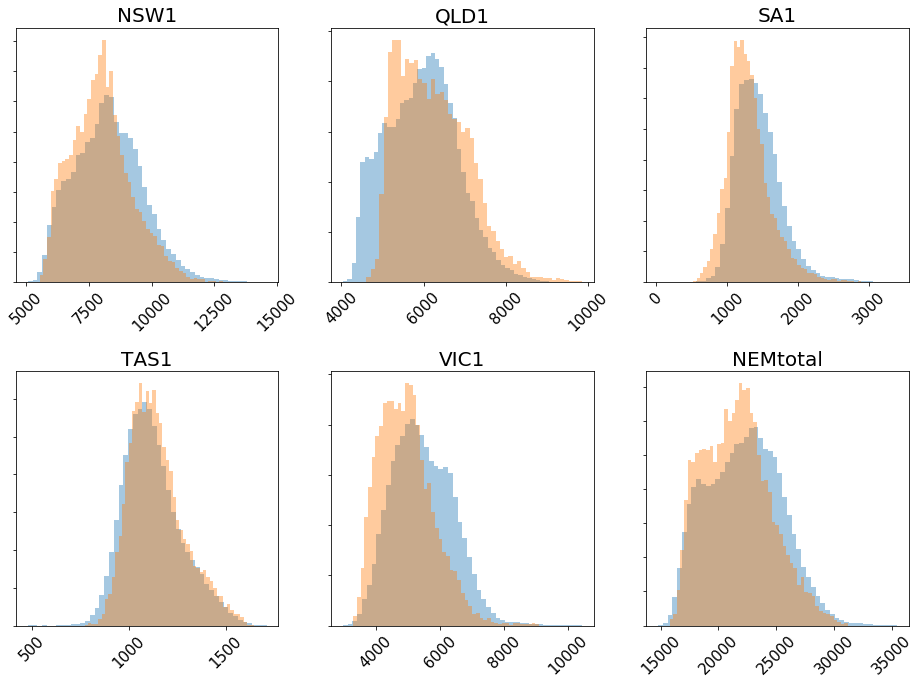

In [58]:
fig1, ax1 = plt.subplots(ncols=3, nrows=2, figsize=(16,11), sharex=False, sharey=False)

ax1 = ax1.flatten()

for a,col in enumerate(dftarget.columns):
    sns.distplot(dftarget[col][dftarget[col].index.year < 2018], kde=False, ax=ax1[a], norm_hist=True)
    sns.distplot(dftarget[col][dftarget[col].index.year == 2018], kde=False, ax=ax1[a], norm_hist=True)
    ax1[a].set_xlabel('')
    ax1[a].set_yticklabels('')
    ax1[a].tick_params('x', labelsize=15, labelrotation=45)
    ax1[a].set_title(col, loc='center', fontsize=20)

fig1.subplots_adjust(wspace= 0.2, hspace=0.35)
# plt.savefig('../charts_out/each_target_MW_hist.png')
plt.show()

In [71]:
d18 = dftarget[dftarget.index.year == 2018]
d18['Time'] = d18.index.time
d18.head()

/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,NSW1,QLD1,SA1,TAS1,VIC1,NEMtotal,Time
SETTLEMENTDATE,,,,,,,
2018-01-01 00:00:00,7034.74,6210.63,1359.47,989.02,4445.07,20038.93,00:00:00
2018-01-01 00:30:00,6912.25,6030.84,1289.10,982.07,4251.18,19465.44,00:30:00
2018-01-01 01:00:00,6745.63,5931.49,1242.28,979.69,4092.53,18991.62,01:00:00
2018-01-01 01:30:00,6466.06,5875.22,1156.19,961.96,3958.95,18418.38,01:30:00
2018-01-01 02:00:00,6279.80,5806.38,1112.46,950.80,3785.27,17934.71,02:00:00


In [82]:
d18.index.month.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='SETTLEMENTDATE')

In [123]:
d18.index.day.unique()

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='SETTLEMENTDATE')

In [128]:
jan_avg = pd.pivot_table(data=d18[(d18.index.month==1) & (d18.index.dayofweek.isin(range(5))) & (d18.index.day.isin([1,26]) == False)], index='Time')
jul_avg = pd.pivot_table(data=d18[(d18.index.month==7) & (d18.index.dayofweek.isin(range(5)))], index='Time')
wkedjan = pd.pivot_table(data=d18[(d18.index.month==1) & ((d18.index.dayofweek.isin([5,6])) | (d18.index.day.isin([1,26])))], index='Time')
wkedjul = pd.pivot_table(data=d18[(d18.index.month==7) & ((d18.index.dayofweek.isin([5,6])) | (d18.index.day.isin([1,26])))], index='Time')


In [94]:
# jan_avg

In [97]:
nem_cmap = {k:v for k,v in zip(['SA1','TAS1', 'NSW1', 'VIC1', 'QLD1'], bpal.Category20_10[::2])}
nem_cmap['NEMtotal'] = 'k'
nem_cmap

{'SA1': '#1f77b4',
 'TAS1': '#ff7f0e',
 'NSW1': '#2ca02c',
 'VIC1': '#d62728',
 'QLD1': '#9467bd',
 'NEMtotal': 'k'}

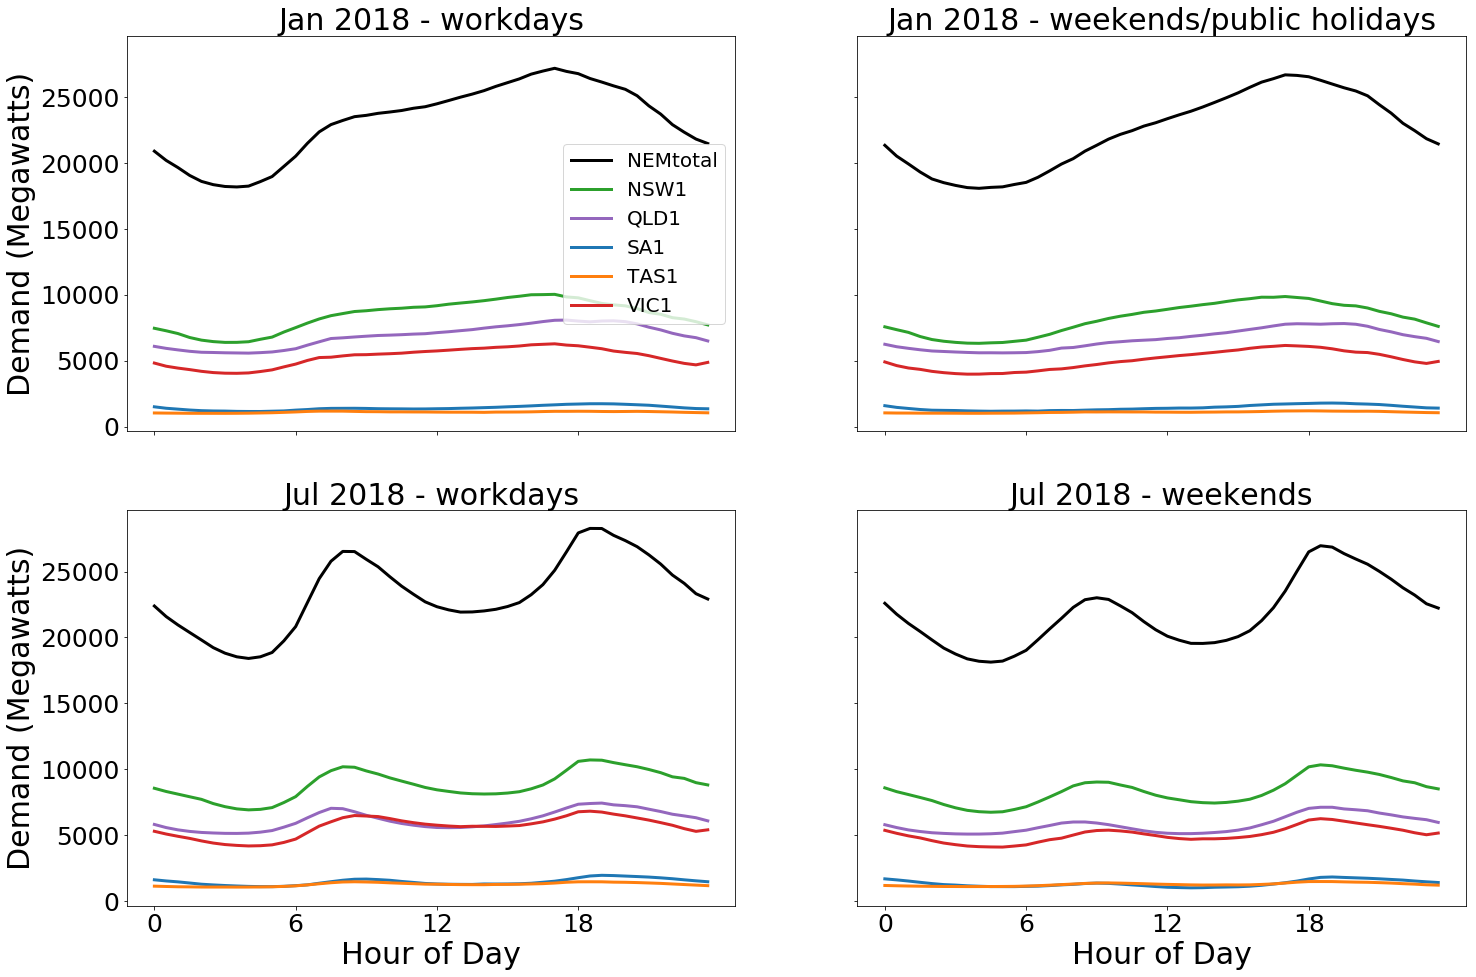

In [182]:
fig_, ax_ = plt.subplots(ncols=2, nrows=2, figsize = (24,16), sharex=True, sharey=True)
ax_ = ax_.flatten()

for r in jan_avg.columns:
    ax_[0].plot(jan_avg.index, jan_avg[r], c=nem_cmap[r], label=r, linewidth=3)
    ax_[1].plot(wkedjan.index, wkedjan[r], c=nem_cmap[r], label=r, linewidth=3)

for r in jul_avg.columns:
    ax_[2].plot(jul_avg.index, jul_avg[r], c=nem_cmap[r], label=r, linewidth=3)
    ax_[3].plot(wkedjul.index, wkedjul[r], c=nem_cmap[r], label=r, linewidth=3)


ax_[0].set_ylabel('Demand (Megawatts)', fontsize=30)
ax_[2].set_ylabel('Demand (Megawatts)', fontsize=30)
ax_[2].set_xlabel('Hour of Day', fontsize=30)
ax_[3].set_xlabel('Hour of Day', fontsize=30)
ax_[0].set_xlabel('')
ax_[1].set_xlabel('')

ax_[0].set_title('Jan 2018 - workdays', fontsize=30)
ax_[1].set_title('Jan 2018 - weekends/public holidays', fontsize=30)
ax_[2].set_title('Jul 2018 - workdays', fontsize=30)
ax_[3].set_title('Jul 2018 - weekends', fontsize=30)
    
ax_[0].legend(loc=5, fontsize=20)

plt.xticks(ticks=jul_avg.index[::12], labels=range(0,25,6))
ax_[0].tick_params('y', labelsize=25)
ax_[2].tick_params('both', labelsize=25)
ax_[3].tick_params('x', labelsize=25)
# plt.suptitle('Average daily demand pattern (MW)', fontsize=20)
plt.savefig('../charts_out/jan-jun-monthly-avg-demand-profile.png')
plt.show()

In [60]:
# fig2, ax2 = plt.subplots()

In [59]:
dftarget

,NSW1,QLD1,SA1,TAS1,VIC1,NEMtotal
SETTLEMENTDATE,,,,,,
2009-01-01 00:30:00,7535.00,5611.54,1310.89,909.71,4799.87,20167.01
2009-01-01 01:00:00,7229.24,5457.34,1272.69,896.63,4646.21,19502.11
2009-01-01 01:30:00,6857.62,5294.12,1178.87,897.52,4950.16,19178.29
2009-01-01 02:00:00,6535.05,5153.47,1130.78,906.22,4755.46,18480.98
2009-01-01 02:30:00,6287.88,5060.33,1059.53,893.19,4545.67,17846.60
2009-01-01 03:00:00,6114.88,4983.49,1010.64,891.48,4344.02,17344.51
2009-01-01 03:30:00,5997.31,4899.56,956.36,890.40,4193.49,16937.12
2009-01-01 04:00:00,5992.67,4819.52,951.95,887.37,4091.29,16742.80
2009-01-01 04:30:00,5982.61,4825.31,933.76,885.54,4062.91,16690.13
